In [27]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [2]:
np.random.seed(1)

In [3]:
x = np.random.normal(0, 1, 100)

In [4]:
eps = np.random.normal(0, 0.25, 100)

$ \beta_0 = -1 $ and $ \beta_1 = 0.5 $

In [5]:
y = [-1 + 0.5*x + e for x,e in zip(x, eps)]

## d)

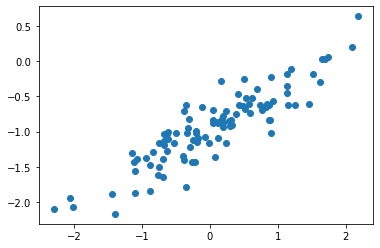

In [6]:
plt.scatter(x, y)

## e)

In [7]:
model = LinearRegression().fit(x.reshape((-1, 1)), y)

$ R^2 = $

In [8]:
model.score(x.reshape((-1, 1)), y)

0.7997346204862734

$\beta_0$ and $\beta_1$ 

In [9]:
(model.intercept_, model.coef_[0])

(-0.9632466175754496, 0.5238567834127928)

In [10]:
y_hat = model.predict(x.reshape((-1, 1)))

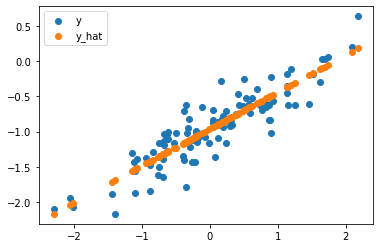

In [11]:
plt.scatter(x, y)
plt.scatter(x, y_hat)
plt.legend(["y", "y_hat"])

## g)

In [12]:
a = x.reshape(-1, 1)
b = (x ** 2).reshape(-1, 1)
x_and_x_squared = np.concatenate((a, b), axis=1)

In [13]:
x_and_x_squared.shape

(100, 2)

In [14]:
model2 = LinearRegression().fit(x_and_x_squared, y)

In [15]:
model2.score(x_and_x_squared, y)

0.7998024699274676

In [25]:
(model2.intercept_, model2.coef_[0], model2.coef_[1])

(-0.9662543007102566, 0.5234049060536485, 0.0038556502345629433)

In [17]:
y_hat2 = model2.predict(x_and_x_squared)

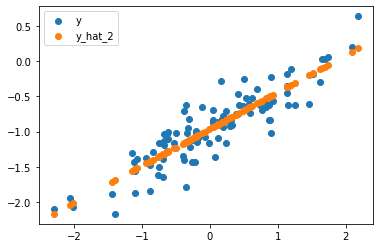

In [18]:
plt.scatter(x, y)
plt.scatter(x, y_hat)
plt.legend(["y", "y_hat_2"])

In [29]:
model_squared = smf.ols(formula='y ~ x + np.square(x)', data=pd.DataFrame({'x':x, 'y':y})).fit()
print(model_squared.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     193.8
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           1.32e-34
Time:                        10:19:04   Log-Likelihood:                 4.2077
No. Observations:                 100   AIC:                            -2.415
Df Residuals:                      97   BIC:                             5.400
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.9663      0.029    -33.486   

### Term kwadratowy nie wpływa na polepszenie modelu. Wysokie p-value podpowiada że ta zmienna nie jest znacząca.

## h) i)

In [19]:
def experiment(noise_variance):
    x = np.random.normal(0, 1, 100)
    eps = np.random.normal(0, noise_variance, 100)
    y = [-1 + 0.5*x + e for x,e in zip(x, eps)]
    _x = x.reshape((-1, 1))
    
    model = LinearRegression().fit(_x, y)
    r2 = model.score(_x, y)
    y_hat = model.predict(_x)
    return x, y, model, r2, y_hat

def plot_experiments(experiments, a, b):
    fig, axs = plt.subplots(a, b, figsize=(25, 10))
    for experiment, ax in zip(experiments, axs.flat):
        x, y, model, r2, y_hat = experiment
        ax.scatter(x, y)
        ax.scatter(x, y_hat)
        ax.legend(["y", "y_hat"])
        ax.title.set_text("R2 = %f" % r2)
        

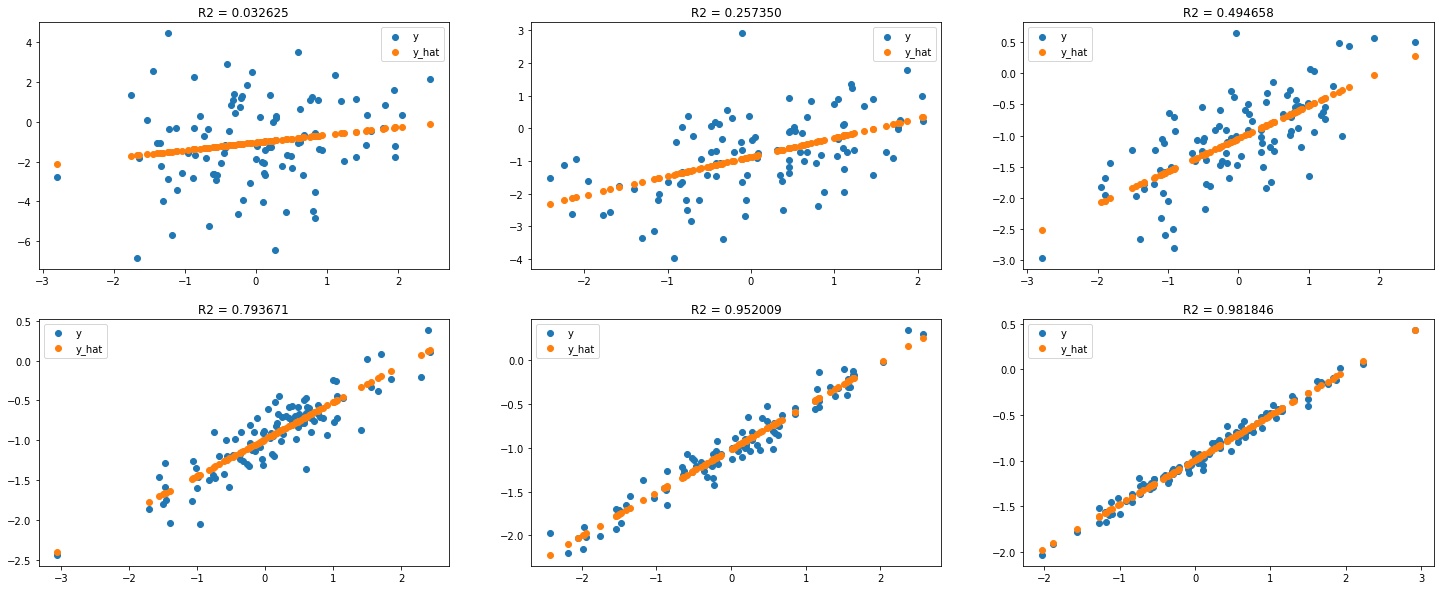

In [20]:
plot_experiments([experiment(2), experiment(1), experiment(0.5), experiment(0.25), experiment(0.125), experiment(0.0625)], 2, 3)

## j)

In [21]:
x_bar = np.mean(x)
y_bar = np.mean(y)
beta_1 = model.coef_[0]

$ \mathbb{SE}(\hat{\beta}_1) = $

In [22]:
se_beta_1 = 1 / np.sqrt(sum([(x_i - x_bar) ** 2 for x_i in x])); se_beta_1

0.11297440885279328

Confidence interval for $ \hat{\beta}_1 $:

In [23]:
(beta_1 - 2*se_beta_1, beta_1 + 2*se_beta_1)

(0.2979079657072063, 0.7498056011183794)